Populating the interactive namespace from numpy and matplotlib


/home/thongvu/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


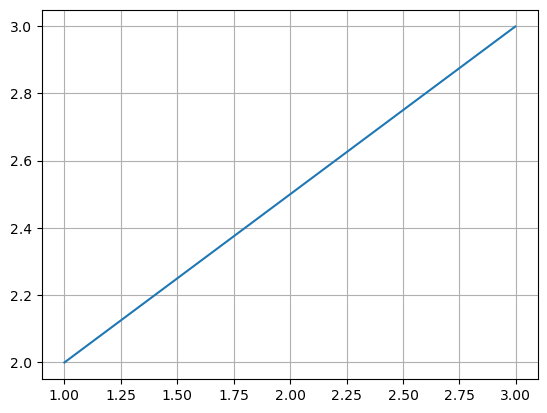

In [2]:
%pylab inline
# Perfect sensor
def sense(x):
    return x
def control(t,y): 
    ux= (3-y[0])
    uy= (3-y[1])
    return array([ux,uy])
def simulate(Δt,x, u): 
    x+=Δt*u # Euler integration 
    return x

tf = 2*pi
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([1.00, 2.00])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

grid()
plot(x_log[:,0], x_log[:,1])

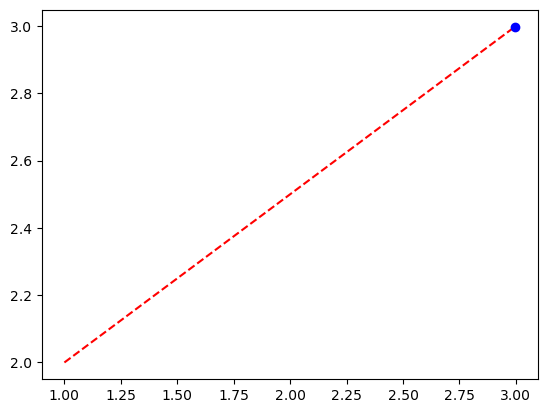

In [5]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


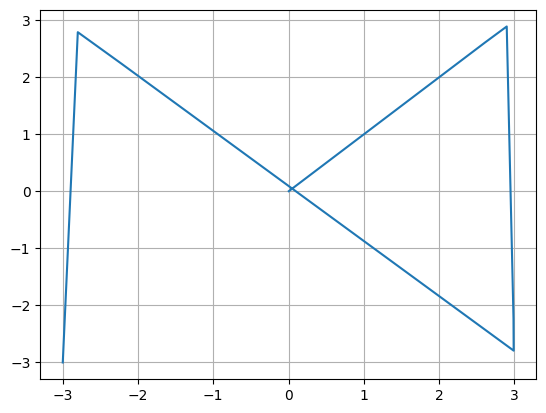

In [1]:
%pylab inline
# Perfect sensor
def sense(x):
    return x
def control(t,target,y): 
    ux= (target[0]-y[0])
    uy= (target[1]-y[1])
    return array([ux,uy])
def simulate(Δt,x, u): 
    x+=Δt*u # Euler integration 
    return x
def moveToTarget(x, x_log, target):
    tf = 2*pi
    Δt = 0.1    # Time step
    time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval
    for t in time:
        y = sense(x)
        u = control(t, target, y)    
        x = simulate(Δt, x, u)
        x_log.append(copy(x))
    return target


# Initial conditions
x = array([-3., -3.])
targetLocations = array([[-2.8, 2.8], [3, -2.8], [2.9, 2.90], [0,0]])
x_log = [copy(x)]
totalTime = linspace(0.,(2*pi), (int((2*pi)/0.1) + 1)*len(targetLocations))  # Time interval

for target in targetLocations:
    x = moveToTarget(x, x_log, target)
x_log = array(x_log)
grid()
plot(x_log[:,0], x_log[:,1])

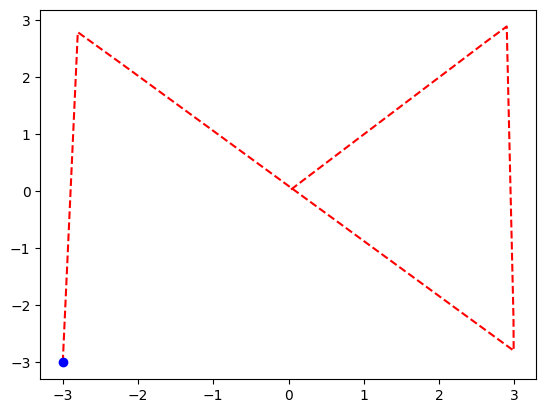

In [2]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(totalTime), interval=60)

HTML(anim.to_jshtml())